# Titanic Binary Prediction

https://www.kaggle.com/competitions/titanic

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

from matplotlib import pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Train / Test split

In [6]:
y_train = train_data.Survived
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
X_train = train_data.iloc[:,2:]
X_test = test_data.iloc[:,1:]

## Drop unnecessary columns

In [8]:
# Drop Name, Ticket and Cabin
X_train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
X_test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
X_all = pd.concat([X_train,X_test],ignore_index=True)

In [9]:
X_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Missing data

In [10]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


In [11]:
X_all.isnull().sum().sort_values(ascending = False)

Age         263
Embarked      2
Fare          1
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
dtype: int64

In [12]:
#imp_age = SimpleImputer(missing_values=np.nan, strategy='median')
#imp_age.fit(X_all.Age.values.reshape(-1,1))
#X_all.Age = imp_age.transform(X_all.Age.values.reshape(-1,1))

C:\Users\courtoiv\AppData\Local\Temp\ipykernel_23236\1827664842.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(X_all.drop(['Sex','Embarked','Fare'], axis=1).corr(), annot=True, cmap='coolwarm')


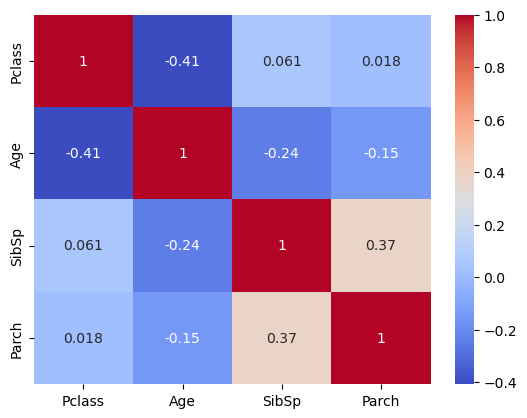

In [13]:
# Check whith what other features age is correlated
_ = sns.heatmap(X_all.drop(['Sex','Embarked','Fare'], axis=1).corr(), annot=True, cmap='coolwarm')

In [14]:
#Age is negatively correlated with PClass, SibSp and Parch
age_nan_indices = list(X_all[X_all['Age'].isnull()].index)
median_age = X_all.Age.median()
for i in age_nan_indices:
    predict_age = X_all.Age[(X_all.SibSp == X_all.iloc[i].SibSp) &
                            (X_all.Parch == X_all.iloc[i].Parch) &
                            (X_all.Pclass == X_all.iloc[i].Pclass)].median()
    if np.isnan(predict_age):
        X_all['Age'].iloc[i] = median_age
    else:
        X_all['Age'].iloc[i] = predict_age

C:\Users\courtoiv\AppData\Local\Temp\ipykernel_23236\3137865934.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['Age'].iloc[i] = predict_age
C:\Users\courtoiv\AppData\Local\Temp\ipykernel_23236\3137865934.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['Age'].iloc[i] = median_age


In [15]:
X_all.isnull().sum().sort_values(ascending = False)

Embarked    2
Fare        1
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [16]:
imp_embarked = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_embarked.fit(X_all.Embarked.values.reshape(-1,1))
X_all.Embarked = imp_embarked.transform(X_all.Embarked.values.reshape(-1,1))

In [17]:
imp_fare = SimpleImputer(missing_values=np.nan, strategy='median')
imp_fare.fit(X_all.Fare.values.reshape(-1,1))
X_all.Fare = imp_fare.transform(X_all.Fare.values.reshape(-1,1))

In [18]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


## Exploratory Data Analysis

### Categorical Variables

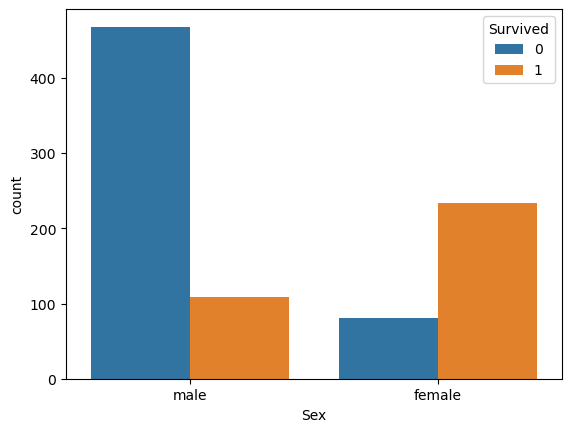

In [19]:
_ = sns.countplot(x='Sex', hue='Survived', data=train_data)

In [20]:
train_data['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [21]:
train_data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


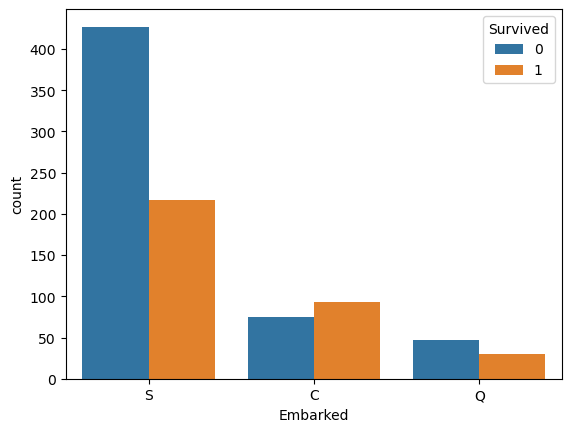

In [22]:
_ = sns.countplot(x='Embarked', hue='Survived', data=train_data)

In [23]:
train_data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [24]:
train_data[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


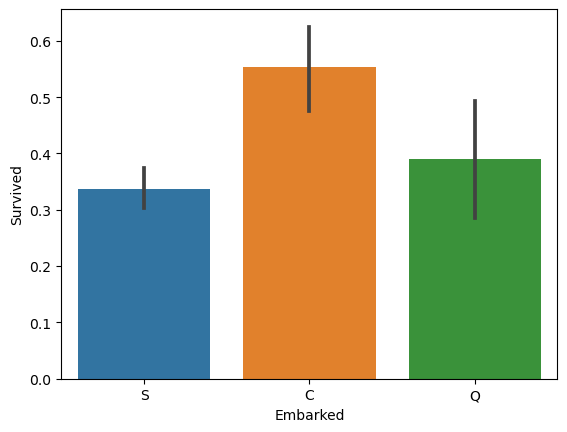

In [25]:
_ = sns.barplot(x='Embarked', y = 'Survived', data=train_data)

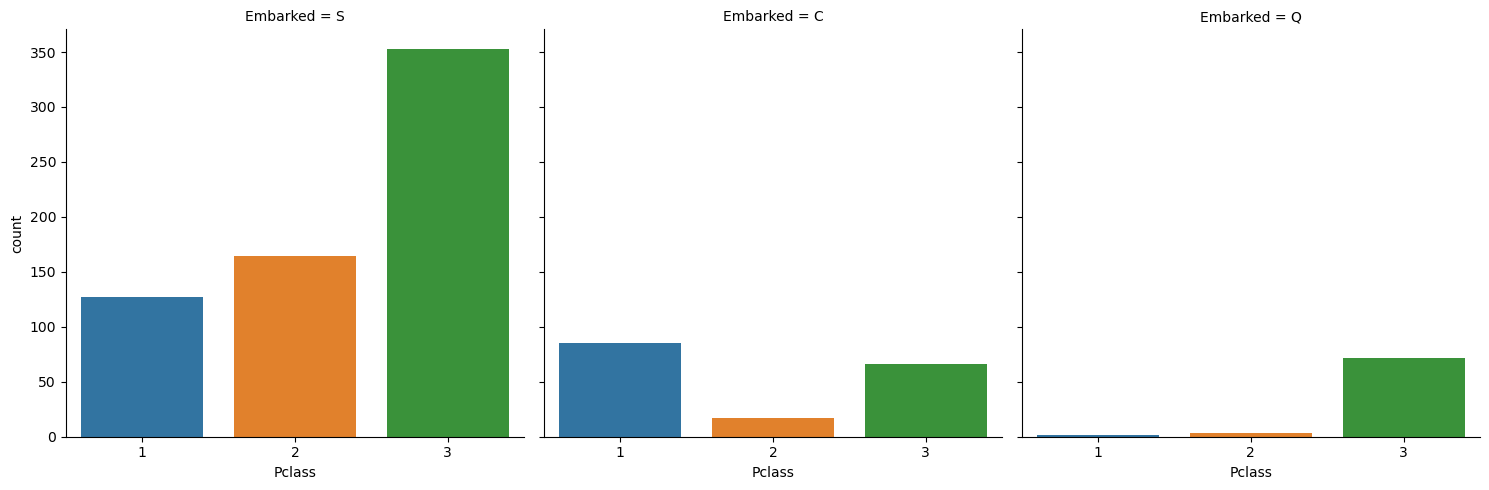

In [26]:
_ = sns.catplot(x='Pclass', col='Embarked', data=train_data, kind='count')

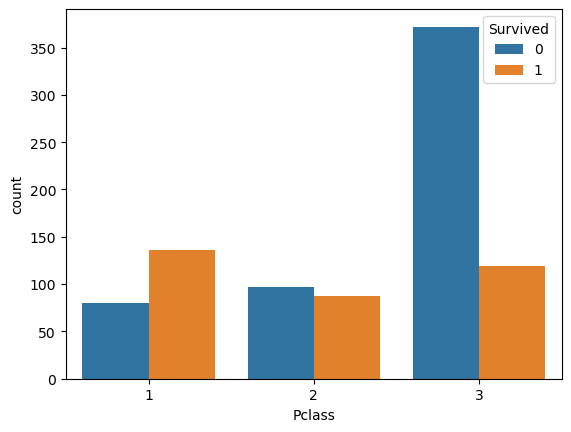

In [27]:
_ = sns.countplot(x='Pclass', hue='Survived', data=train_data)

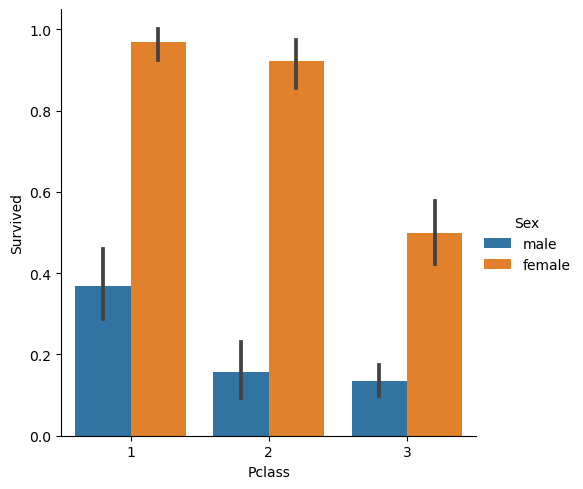

In [28]:
_ = sns.catplot(x='Pclass', y = 'Survived', hue='Sex', data=train_data, kind='bar')

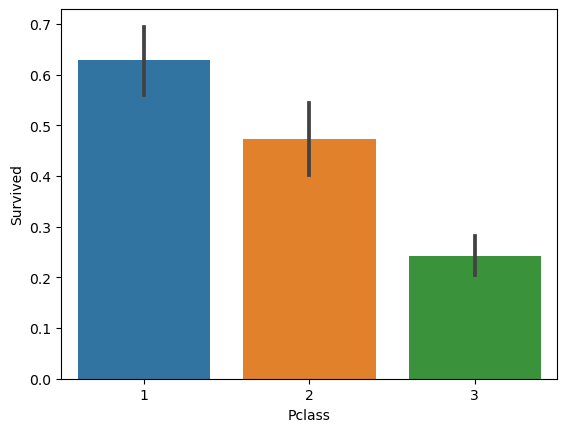

In [29]:
_ = sns.barplot(x='Pclass', y='Survived', data=train_data)

In [30]:
train_data['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
train_data[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Numerical variables

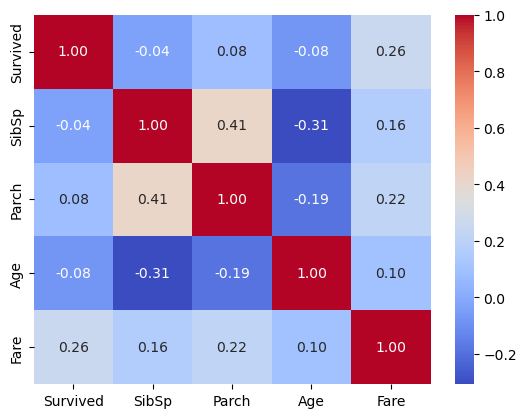

In [32]:
_ = sns.heatmap(train_data[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, fmt='.2f', cmap = 'coolwarm')

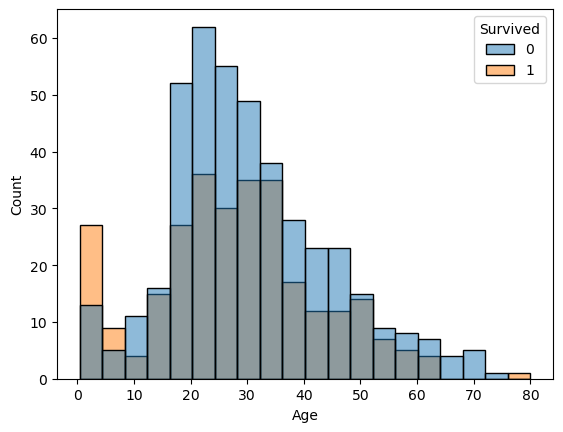

In [33]:
_ = sns.histplot(x='Age', hue='Survived', data=train_data)

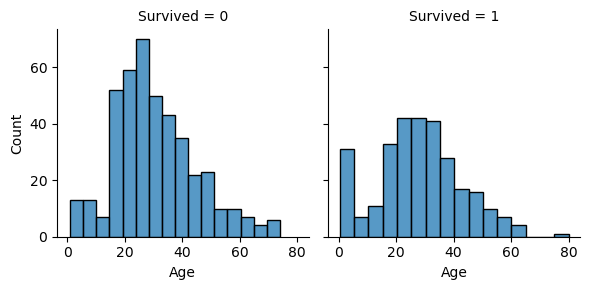

In [34]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(sns.histplot, 'Age')

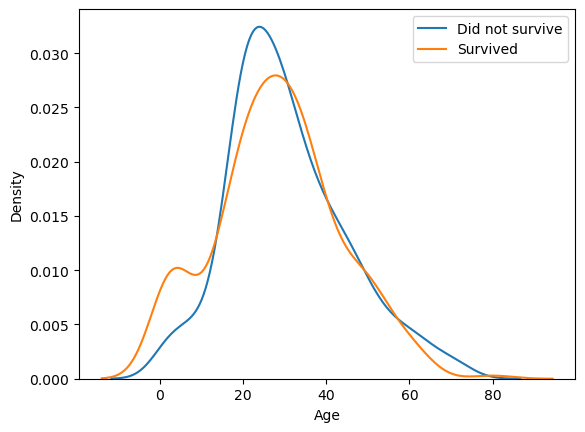

In [35]:
_ = sns.kdeplot(train_data['Age'][train_data['Survived'] == 0], label = "Did not survive")
_ = sns.kdeplot(train_data['Age'][train_data['Survived'] == 1], label = "Survived")
_ = plt.legend()

In [36]:
train_data['Age'].value_counts(dropna = False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

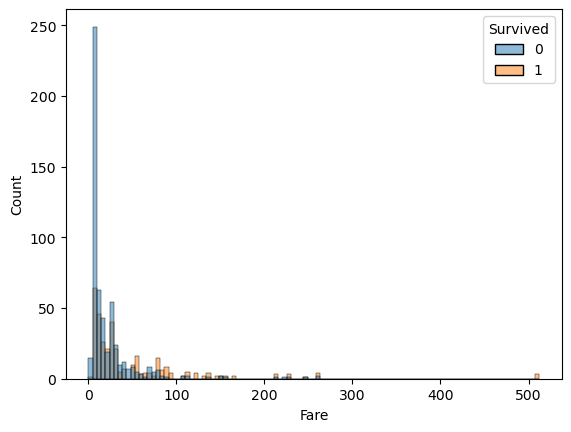

In [37]:
_ = sns.histplot(x='Fare', hue='Survived', data=train_data)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

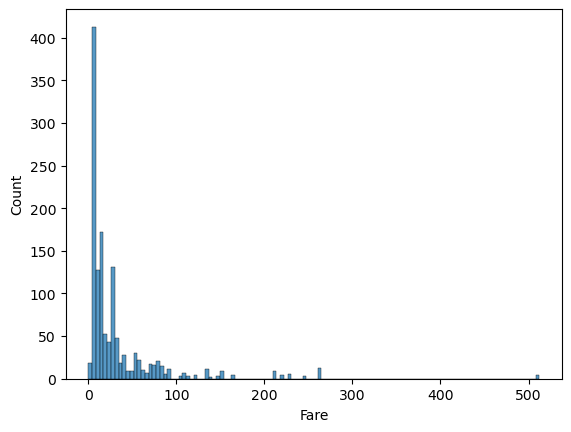

In [38]:
sns.histplot(x='Fare', data=X_all)

In [39]:
#X_all['logfare'] = np.log(X_all['Fare'] + 1)
X_all['Fare'] = X_all['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

In [40]:
X_all

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S
...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,25.0,0,0,2.085672,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,4.690430,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,1.981001,S
1307,3,"Ware, Mr. Frederick",male,25.0,0,0,2.085672,S


<AxesSubplot: xlabel='Fare', ylabel='Count'>

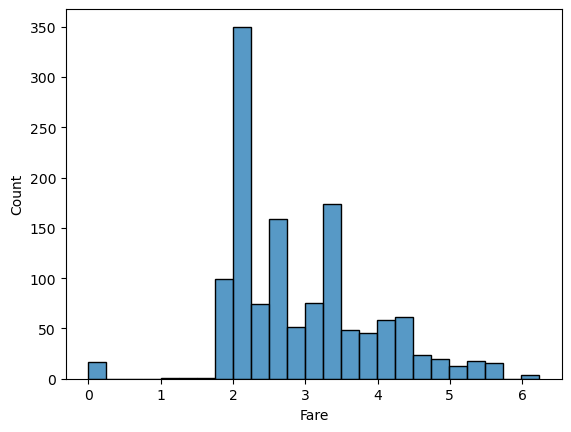

In [41]:
sns.histplot(x='Fare', data=X_all)

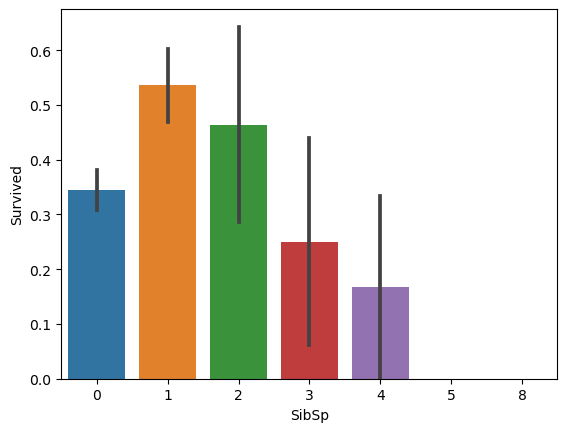

In [42]:
_ = sns.barplot(x='SibSp', y='Survived', data=train_data)

In [43]:
train_data['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [44]:
train_data[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [45]:
X_all.loc[X_all['SibSp'] >= 2,'SibSp'] = 2

In [46]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


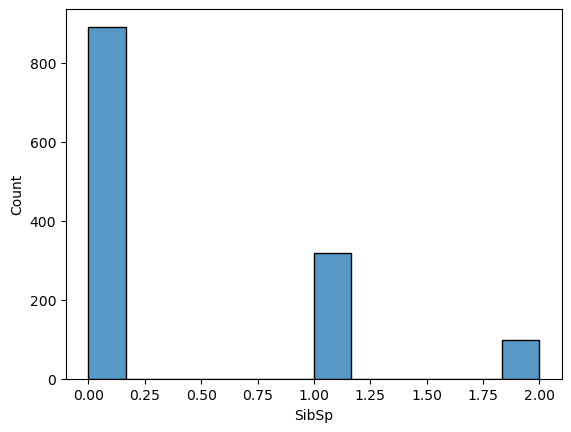

In [47]:
_ = sns.histplot(x='SibSp', data=X_all)

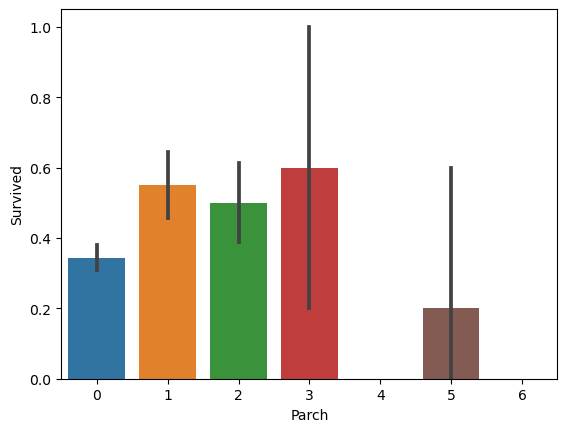

In [48]:
_ = sns.barplot(x='Parch', y='Survived', data=train_data)

In [49]:
train_data['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [50]:
train_data[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


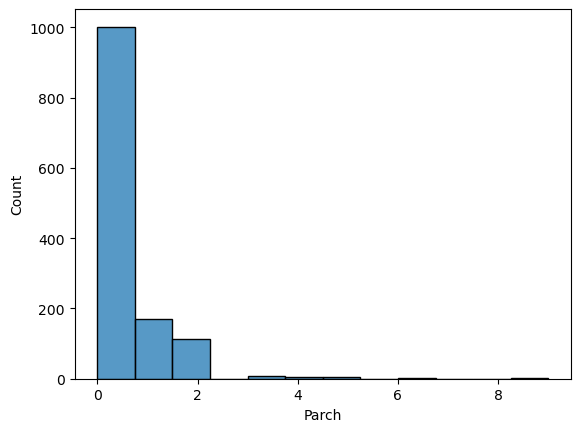

In [51]:
_ = sns.histplot(x='Parch', data=X_all)

In [52]:
X_all.loc[X_all['Parch'] >= 2,'Parch'] = 2

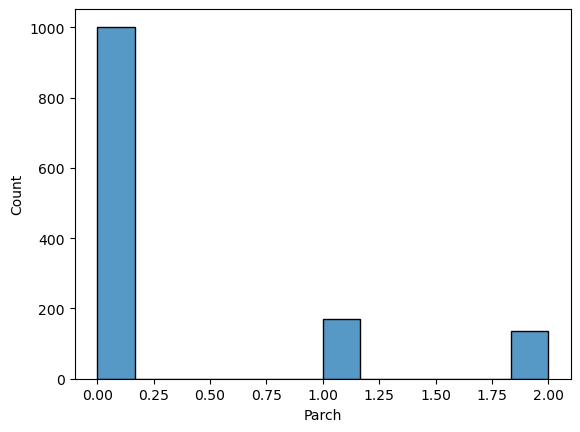

In [53]:
_ = sns.histplot(x='Parch', data=X_all)

## Feature Engineering

In [54]:
X_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S


### Title

In [55]:
X_all['Title'] = [name.split(',')[1].split('.')[0].strip() for name in X_all.Name]

In [56]:
X_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S,Mr


In [57]:
X_all.Title.value_counts(dropna = False)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [58]:
# Simplify Titles
X_all.Title = X_all.Title.replace(['Mlle','Ms'], 'Miss')
X_all.Title = X_all.Title.replace(['Mme','Lady','Dona'], 'Mrs')
X_all.Title = X_all.Title.replace(['Rev','Dr','Col','Major','Sir','Don','Capt','the Countess','Jonkheer'], 'Rare')
X_all.drop(['Name'], axis=1, inplace=True)

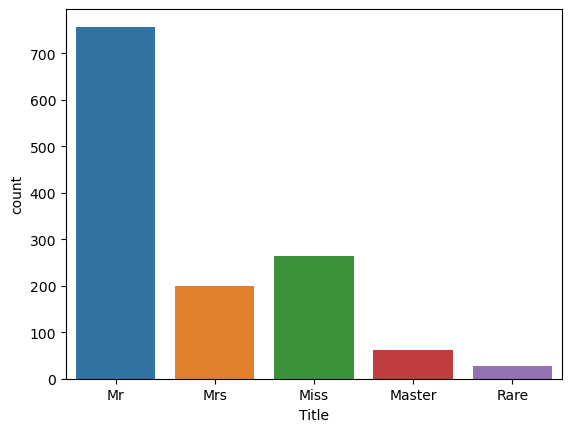

In [59]:
_ = sns.countplot(x=X_all['Title'])

In [60]:
# Calculate family Size from SibSp and Parch
X_all['FamilySize'] = X_all['SibSp'] + X_all['Parch'] + 1
X_all[['SibSp','Parch','FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,2,1,4
8,0,2,3
9,1,0,2


In [61]:
X_all['IsAlone'] = 0
X_all.loc[X_all['FamilySize'] == 1, 'IsAlone'] = 1

### Ageband, Age*Class

In [62]:
X_all['AgeBand'] = pd.cut(X_all['Age'],5)
X_all.AgeBand.value_counts(dropna=False)

(16.136, 32.102]    727
(32.102, 48.068]    308
(0.0902, 16.136]    155
(48.068, 64.034]    106
(64.034, 80.0]       13
Name: AgeBand, dtype: int64

In [63]:
# Assign ordinal to each age band
X_all['AgeGroup'] = 0
#X_all.loc[X_all['Age'] <= 16, 'Age'] = 0
X_all.loc[(X_all['Age'] > 16) & (X_all['Age'] <= 32 ), 'AgeGroup'] = 1
X_all.loc[(X_all['Age'] > 32) & (X_all['Age'] <= 48 ), 'AgeGroup'] = 2
X_all.loc[(X_all['Age'] > 48) & (X_all['Age'] <= 64 ), 'AgeGroup'] = 3
X_all.loc[(X_all['Age'] > 64), 'AgeGroup'] = 4

In [64]:
X_all.AgeGroup.value_counts()

1    727
2    308
0    155
3    106
4     13
Name: AgeGroup, dtype: int64

In [65]:
X_all.drop('AgeBand', axis=1, inplace=True)

In [66]:
#X_all.drop('Age', axis=1, inplace=True)

In [67]:
X_all['Age*Class'] = X_all['AgeGroup'] * X_all['Pclass']

In [68]:
X_all.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeGroup,Age*Class
0,3,male,22.0,1,0,1.981001,S,Mr,2,0,1,3
1,1,female,38.0,1,0,4.266662,C,Mrs,2,0,2,2
2,3,female,26.0,0,0,2.070022,S,Miss,1,1,1,3
3,1,female,35.0,1,0,3.972177,S,Mrs,2,0,2,2
4,3,male,35.0,0,0,2.085672,S,Mr,1,1,2,6


## Encode categorical data and scale continuous data

In [69]:
# On hot encoding of categorical data
X_all = pd.get_dummies(X_all, columns=['Sex', 'Embarked','Title'], drop_first=True)

In [70]:
X_all

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,AgeGroup,Age*Class,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.0,1,0,1.981001,2,0,1,3,1,0,1,0,1,0,0
1,1,38.0,1,0,4.266662,2,0,2,2,0,0,0,0,0,1,0
2,3,26.0,0,0,2.070022,1,1,1,3,0,0,1,1,0,0,0
3,1,35.0,1,0,3.972177,2,0,2,2,0,0,1,0,0,1,0
4,3,35.0,0,0,2.085672,1,1,2,6,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,25.0,0,0,2.085672,1,1,1,3,1,0,1,0,1,0,0
1305,1,39.0,0,0,4.690430,1,1,2,2,0,0,0,0,0,1,0
1306,3,38.5,0,0,1.981001,1,1,2,6,1,0,1,0,1,0,0
1307,3,25.0,0,0,2.085672,1,1,1,3,1,0,1,0,1,0,0


In [71]:
X_all.drop(['AgeGroup','FamilySize','Parch','SibSp'], axis=1, inplace=True)

In [72]:
X_all

,Pclass,Age,Fare,IsAlone,Age*Class,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.0,1.981001,0,3,1,0,1,0,1,0,0
1,1,38.0,4.266662,0,2,0,0,0,0,0,1,0
2,3,26.0,2.070022,1,3,0,0,1,1,0,0,0
3,1,35.0,3.972177,0,2,0,0,1,0,0,1,0
4,3,35.0,2.085672,1,6,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,25.0,2.085672,1,3,1,0,1,0,1,0,0
1305,1,39.0,4.690430,1,2,0,0,0,0,0,1,0
1306,3,38.5,1.981001,1,6,1,0,1,0,1,0,0
1307,3,25.0,2.085672,1,3,1,0,1,0,1,0,0


## Feature Selection

In [73]:
# First shot: Age, Sex, Class
#X_all = X_all.filter(items=['Age','Sex_male','Pclass_2', 'Pclass_3'])
X_train=X_all[:891]
X_test=X_all[891:]

## Scaling

In [74]:
scaler = StandardScaler()
X_all_scaled = X_all
X_all_scaled[['Age','Fare']] = scaler.fit_transform(X_all_scaled[['Age','Fare']])
#X_all_scaled = scaler.fit_transform(X_all)
X_train_scaled=X_all_scaled[:891]
X_test_scaled=X_all_scaled[891:]

In [75]:
X_all_scaled

,Pclass,Age,Fare,IsAlone,Age*Class,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,-0.541537,-0.926162,0,3,1,0,1,0,1,0,0
1,1,0.664775,1.351520,0,2,0,0,0,0,0,1,0
2,3,-0.239959,-0.837452,1,3,0,0,1,1,0,0,0
3,1,0.438592,1.058063,0,2,0,0,1,0,0,1,0
4,3,0.438592,-0.821857,1,6,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,-0.315353,-0.821857,1,3,1,0,1,0,1,0,0
1305,1,0.740170,1.773809,1,2,0,0,0,0,0,1,0
1306,3,0.702472,-0.926162,1,6,1,0,1,0,1,0,0
1307,3,-0.315353,-0.821857,1,3,1,0,1,0,1,0,0


## Random Forest Model

In [76]:
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter Tuning

In [77]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {#'min_samples_leaf': [400]
              #'min_samples_split': [i+2 for i in range(5)],
              'max_depth': [1, 2, 3, 4, 5],
              #'min_samples_leaf': [n+1 for n in range(1000)]    
              #'max_features': ['sqrt','log2',None],
              #'bootstrap': [True, False],
              #'criterion': ['gini','entropy','log_loss']
             }

In [78]:
clf = RandomForestClassifier(random_state = 1971, n_jobs = -1)

random_search = RandomizedSearchCV(clf,
                           param_distributions=param_dist,
                           n_iter=100,
                           cv=5,
                           scoring='accuracy',
                           random_state=1971,
                           refit = True)
random_search.fit(X_train,y_train)

C:\Users\courtoiv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=100. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=1971),
                   n_iter=100,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5]},
                   random_state=1971, scoring='accuracy')

In [79]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 5}
Best score is 0.8237712635741635


In [80]:
predictions_rf = random_search.best_estimator_.predict(X_test)

In [81]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_rf})
output.to_csv('submission_rf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## K Neighbors Classier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
param_dist = {'n_neighbors': [1,2,3,4,5,6,7,8,9]
              #'n_neighbors': [50*(n+1) for n in range(30)]
              #'p': [1,2]
              #'max_features': ['auto','sqrt','log2',None]
              #'bootstrap': [True, False],
              #'criterion': ['gini','entropy']
             }

In [83]:
clf = KNeighborsClassifier(n_jobs = -1)

random_search = RandomizedSearchCV(clf,
                           param_distributions=param_dist,
                           n_iter=100,
                           cv=5,
                           scoring='accuracy',
                           random_state=1971,
                           refit = True)

random_search.fit(X_train_scaled,y_train)

C:\Users\courtoiv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=100,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9]},
                   random_state=1971, scoring='accuracy')

In [84]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned Decision Tree Parameters: {'n_neighbors': 5}
Best score is 0.817079907099366


In [85]:
predictions_knn = random_search.best_estimator_.predict(X_test_scaled)

In [86]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_knn})
output.to_csv('submission_knn.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## XGBoost

In [87]:
import xgboost as xgb

In [88]:
param_dist = {'learning_rate': [0.01,0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1.0],
              'max_depth': [2,3,4,5]
              #'booster': ['gbtree'],
              #'grow_policy': ['depthwise'],
              #'min_child_weight': [i*20 for i in range(1,250)]
             }

In [89]:
clf = xgb.XGBClassifier(n_jobs = -1,
                        random_state=1971,
                        objective='binary:logistic',
                        eval_metric = 'error',
                        #gpu_id=0,
                        #tree_method='gpu_hist'
                       )

random_search = RandomizedSearchCV(clf,
                           param_distributions=param_dist,
                           n_iter=100,
                           cv=5,
                           scoring='accuracy',
                           random_state=1971,
                           refit = True)

random_search.fit(X_train_scaled,y_train)

C:\Users\courtoiv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='error',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_r...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=1971, ...),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.25,
                                                          0.3, 0.5, 0.75, 1.0],
                                        'max_depth': [2, 3, 4, 5]},
                   random_state=1971, scoring='accuracy')

In [90]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 3, 'learning_rate': 0.3}
Best score is 0.8496076831335133


In [91]:
predictions_xgb = random_search.best_estimator_.predict(X_test_scaled)

In [92]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_xgb})
output.to_csv('submission_xgb.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
param_dist = {# 'C': [1000]
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              #'penalty': ['l2','none']
              #'solver': ['newton-cg','lbgfs','liblinear','sag','saga']
             }

In [95]:
clf = LogisticRegression(n_jobs = -1,
                         random_state = 1971
                         )

In [96]:
random_search = RandomizedSearchCV(clf,
                           param_distributions=param_dist,
                           n_iter=100,
                           cv=5,
                           scoring='accuracy',
                           random_state=1971,
                           refit = True)

random_search.fit(X_train_scaled,y_train)

C:\Users\courtoiv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(n_jobs=-1, random_state=1971),
                   n_iter=100,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000]},
                   random_state=1971, scoring='accuracy')

In [97]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned Decision Tree Parameters: {'C': 10}
Best score is 0.8058376749733224


In [98]:
predictions_logreg = random_search.best_estimator_.predict(X_test_scaled)

In [99]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_logreg})
output.to_csv('submission_logreg.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Multi Layer Perceptron

In [100]:
from sklearn.neural_network import MLPClassifier

In [101]:
param_dist = {'hidden_layer_sizes': [(10), (10,10), (10,10,10), (20), (20,20), (30)],
              'activation': ['relu'],
              'batch_size': [10,20,30],
              'learning_rate': ['constant', 'invscaling']
             }

In [102]:
clf = MLPClassifier(random_state = 1971, early_stopping = True)

In [103]:
random_search = RandomizedSearchCV(clf,
                           param_distributions=param_dist,
                           n_iter=100,
                           cv=5,
                           scoring='accuracy',
                           random_state=1971,
                           refit = True)

random_search.fit(X_train_scaled,y_train)

C:\Users\courtoiv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(early_stopping=True,
                                           random_state=1971),
                   n_iter=100,
                   param_distributions={'activation': ['relu'],
                                        'batch_size': [10, 20, 30],
                                        'hidden_layer_sizes': [10, (10, 10),
                                                               (10, 10, 10), 20,
                                                               (20, 20), 30],
                                        'learning_rate': ['constant',
                                                          'invscaling']},
                   random_state=1971, scoring='accuracy')

In [104]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned Decision Tree Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (10, 10, 10), 'batch_size': 20, 'activation': 'relu'}
Best score is 0.8013370158809867


In [105]:
predictions_mlp = random_search.best_estimator_.predict(X_test_scaled)

In [106]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_mlp})
output.to_csv('submission_mlp.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Majority vote on predictions

In [107]:
predictions_combined = (predictions_xgb + predictions_rf + predictions_knn + predictions_logreg + predictions_mlp >=3).astype(int)

In [108]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_combined})
output.to_csv('submission_combined.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
